# **AUTHOR : Emanuel ALIDJINOU**

# **Flights Data Exploration Challenge**


**In this challenge, I'll explore a real-world dataset containing flights data from the US Department of Transportation.**

In [1]:
! pip install scikit_posthocs


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Importing the necessary libraries for the task**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f
import scikit_posthocs as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from statsmodels.formula.api import ols
from scipy.stats import kruskal, shapiro, levene, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# **Importing the dataset**

In [3]:
# Let’s display the dataset
url = "https://drive.google.com/uc?export=download&id=1jDsphRavXLcQ_IOkp11g6qiFXriLOmNo"
df = pd.read_csv(url)
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of **US domestic flights in 2013**, and consists of the following fields:

* **Year**: The year of the flight (all records are from 2013)

* **Month**: The month of the flight

* **DayofMonth**: The day of the month on which the flight departed

* **DayOfWeek**: The day of the week on which the flight departed – from 1 (Monday) to 7 (Sunday)

* **Carrier**: The two-letter abbreviation for the airline

* **OriginAirportID**: A unique numeric identifier for the departure airport

* **OriginAirportName**: The full name of the departure airport

* **OriginCity**: The city of the departure airport

* **OriginState**: The state of the departure airport

* **DestAirportID**: A unique numeric identifier for the destination airport

* **DestAirportName**: The full name of the destination airport

* **DestCity**: The city of the destination airport

* **DestState**: The state of the destination airport

* **CRSDepTime**: The scheduled departure time

* **DepDelay**: The number of minutes the departure was delayed (flights that left ahead of schedule have a negative value)

* **DepDelay15**: A binary indicator showing whether the departure was delayed by more than 15 minutes (and therefore considered “late”)

* **CRSArrTime**: The scheduled arrival time

* **ArrDelay**: The number of minutes the arrival was delayed (flights that arrived ahead of schedule have a negative value)

* **ArrDelay15**: A binary indicator showing whether the arrival was delayed by more than 15 minutes (and therefore considered “late”)

* **Cancelled**: A binary indicator showing whether the flight was cancelled


# **Exploration of flight data and analysis of possible factors influencing departure or arrival delays.**


`Data size`

In [147]:
dim = df.shape
print(f"The dataset contains a total of {dim[0]} observations and {dim[1]} variables.")


The dataset contains a total of 271940 observations and 20 variables.


# **Cleaning the dataset**

# **Identification of all null or missing data**

In [148]:
# Detection of missing values
var_na = df.isnull().sum()
var_na

,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
Carrier,0
OriginAirportID,0
OriginAirportName,0
OriginCity,0
OriginState,0
DestAirportID,0


In [149]:
na_per = (2761/271940)*100
print(f"Only the variable DepDel15 in the dataset contains 2761 missing values.\nThat means the dataset contains {na_per}% of missing values.")


Only the variable DepDel15 in the dataset contains 2761 missing values.
That means the dataset contains 1.0152974920938442% of missing values.


* **Duplicated rows**

In [150]:
dup_rows = df[df.duplicated()]
dup_rows

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


- **No duplicates in the dataset**


# **Removal of missing values.**


In [151]:
df_flights = df.copy().dropna()
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0



# **Detection of outliers**


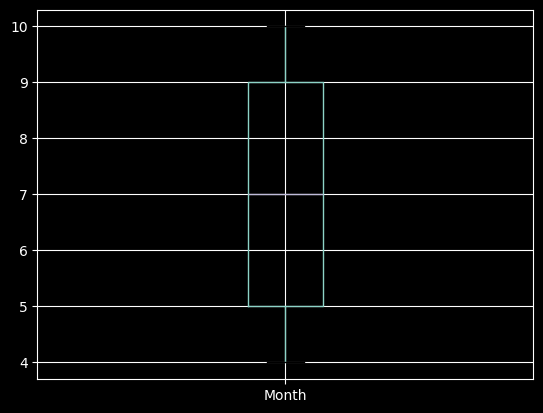

In [152]:
# Month
df_flights.boxplot(column=["Month"], vert = True)
plt.show()

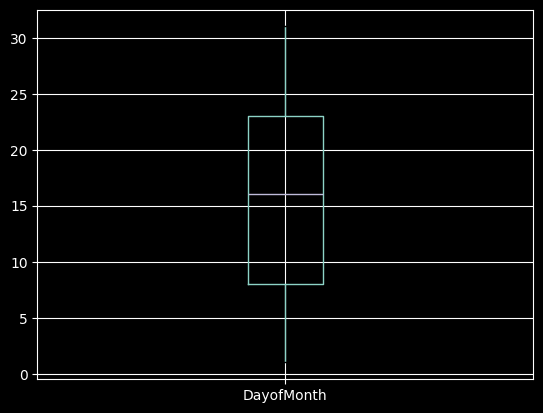

In [153]:
# DayofMonth

df_flights.boxplot(column=["DayofMonth"], vert = True)
plt.show()

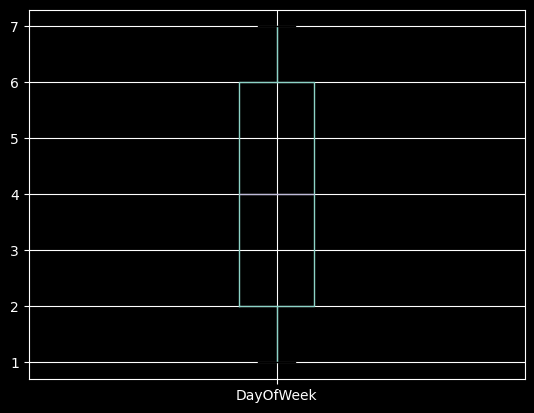

In [154]:
# DayOfWeek

df_flights.boxplot(column=["DayOfWeek"], vert = True)
plt.show()

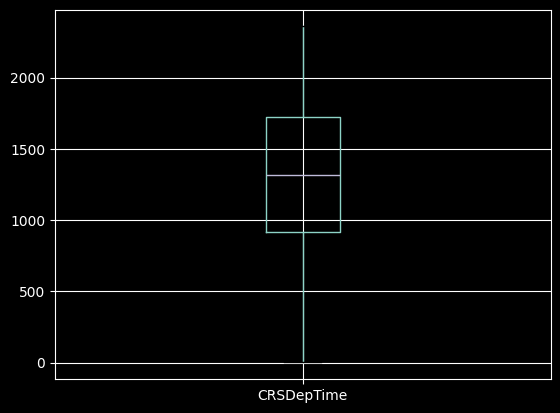

In [155]:
# CRSDepTime

df_flights.boxplot(column="CRSDepTime", vert = True)
plt.show()

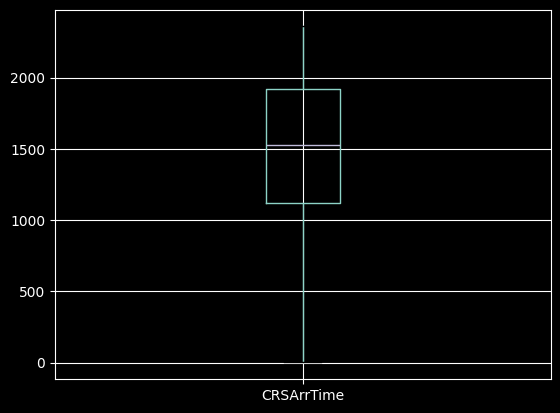

In [156]:
# CRSArrTime

df_flights.boxplot(column="CRSArrTime", vert = True)
plt.show()

**Detection of abnormally high or low delays**


**Identification of outliers for DepDelay and ArrDelay**




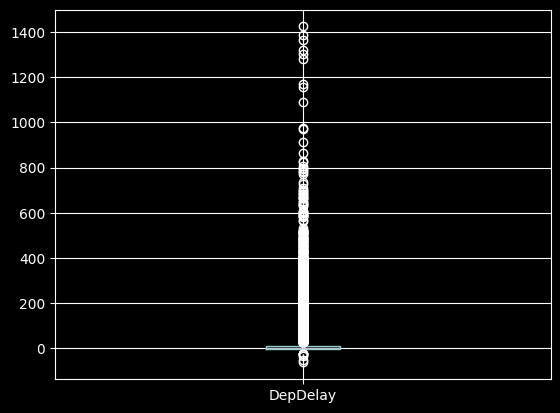

In [157]:
# DepDelay

df_flights.boxplot(column = "DepDelay", vert = True)
plt.show()

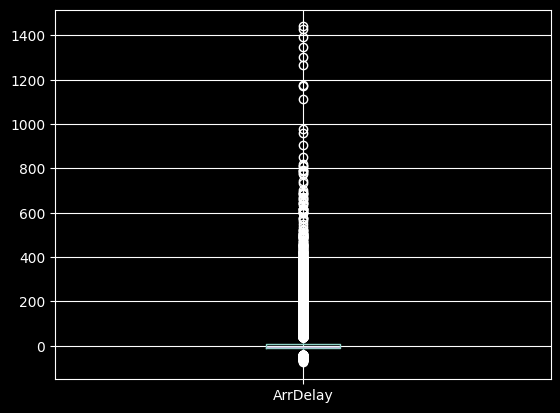

In [158]:
# ArrDelay

df_flights.boxplot(column="ArrDelay", vert = True)
plt.show()

**From these boxplots, we can assert that the variables in the dataset do not contain outliers.**

The same applies to `DepDelay` and `ArrDelay`.

**Exceptionally long delays recorded at departure and arrival can generally be explained by flight rescheduling due to adverse weather conditions, technical issues, or logistical problems.**


# Exploration of the dataset variables


**`Exploration of qualitative variables`**


/tmp/ipython-input-1851998090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dest.values, y=top_dest.index, palette="viridis")


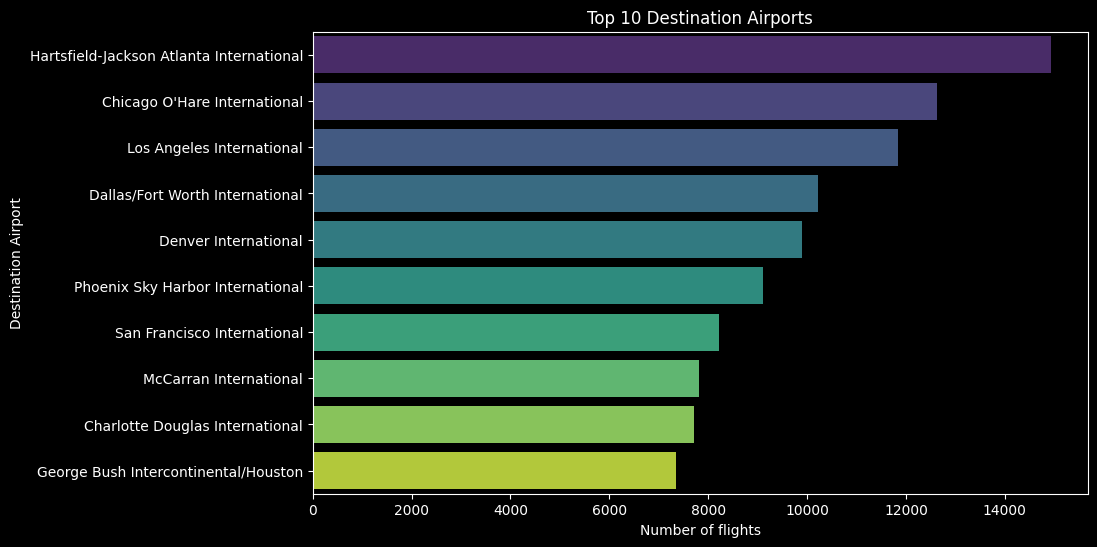

In [159]:
# The 10 most frequent destination airports

top_dest = df_flights['DestAirportName'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_dest.values, y=top_dest.index, palette="viridis")
plt.title("Top 10 Destination Airports")
plt.xlabel("Number of flights")
plt.ylabel("Destination Airport")
plt.show()

**The diagram above shows the 10 most frequent destination airports.**

*Among them, Hartsfield-Jackson Atlanta International stands out as the most visited destination airport.*


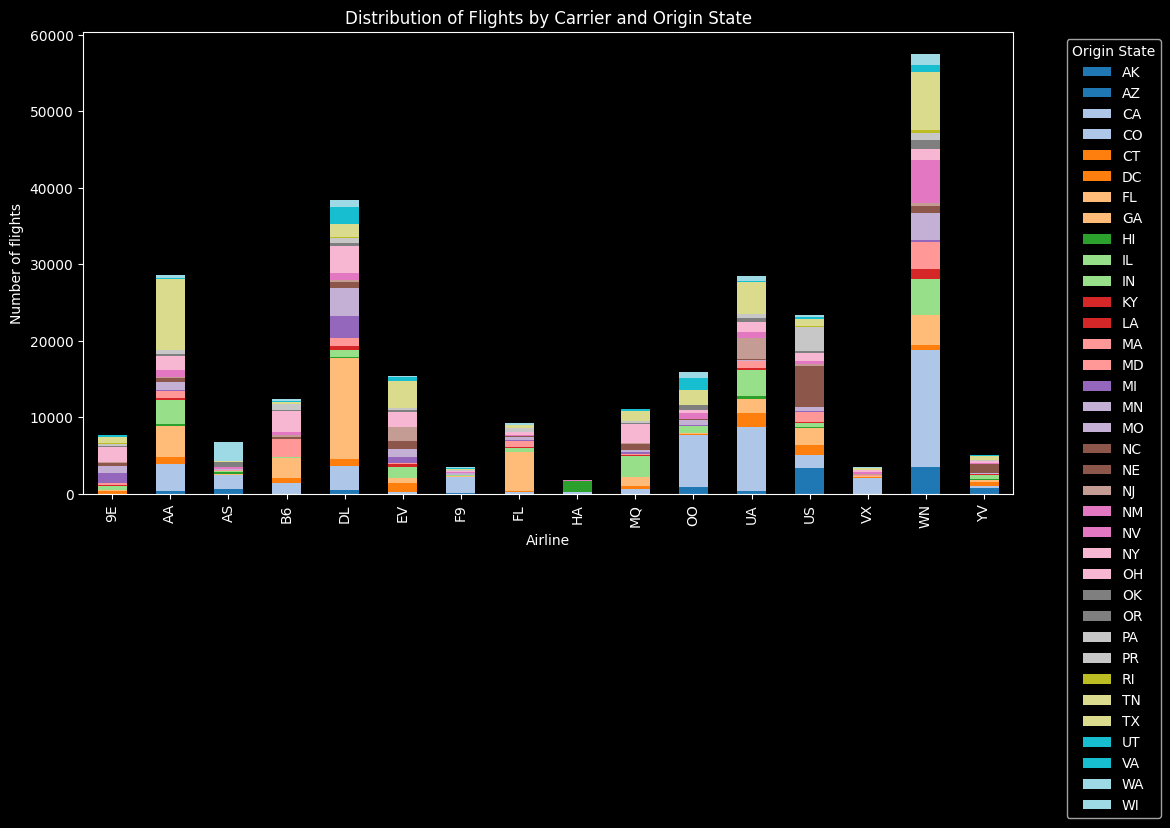

In [160]:
# Comparison between carrier and origin state variables

cross = pd.crosstab(df_flights['Carrier'], df_flights['OriginState'])
cross.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Distribution of Flights by Carrier and Origin State")
plt.xlabel("Airline")
plt.ylabel("Number of flights")
plt.legend(title="Origin State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

*From this graph, we can see that the carrier `WN` recorded the highest number of flights.*

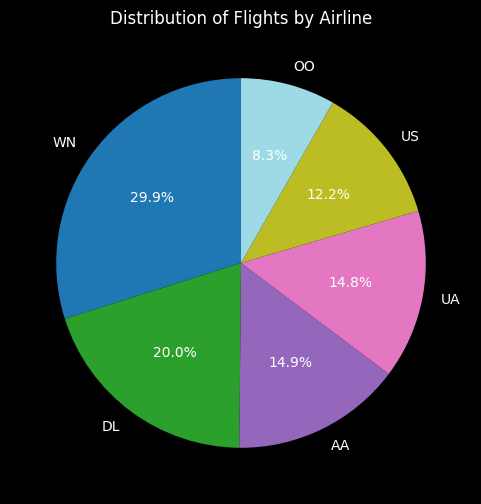

In [161]:
# Pie chart
df_flights['Carrier'].value_counts().head(6).plot.pie(
autopct='%1.1f%%',
startangle=90,
cmap='tab20',
figsize=(6,6)
)
plt.title("Distribution of Flights by Airline")
plt.ylabel("")
plt.show()

**`Exploration of quantitative variables`**

**Descriptive statistics**

In [162]:
df_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,269179.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
Month,269179.0,6.983877,1.983873,4.0,5.0,7.0,9.0,10.0
DayofMonth,269179.0,15.817259,8.805963,1.0,8.0,16.0,23.0,31.0
DayOfWeek,269179.0,3.902336,1.989296,1.0,2.0,4.0,6.0,7.0
OriginAirportID,269179.0,12744.767642,1501.949045,10140.0,11292.0,12892.0,14057.0,15376.0
DestAirportID,269179.0,12739.446093,1503.506863,10140.0,11292.0,12892.0,14057.0,15376.0
CRSDepTime,269179.0,1324.412933,470.760511,1.0,920.0,1319.0,1722.0,2359.0
DepDelay,269179.0,10.456614,35.840715,-63.0,-4.0,-1.0,9.0,1425.0
DepDel15,269179.0,0.201134,0.400849,0.0,0.0,0.0,0.0,1.0
CRSArrTime,269179.0,1504.637338,493.215438,1.0,1119.0,1527.0,1917.0,2359.0


The table presents a statistical summary of flights recorded in 2013, covering 269,179 observations. On average, flights experience a slight delay of about 10 minutes at departure and 6 minutes at arrival, although some extreme delays reach over 1,400 minutes, revealing exceptional cases or flight rescheduling. Most flights are not canceled, and scheduled departure and arrival times logically range between 01:00 and 23:59, illustrating a balanced distribution throughout the day.


# **Distribution of DepDelay and ArrDelay**

**The Histograms**

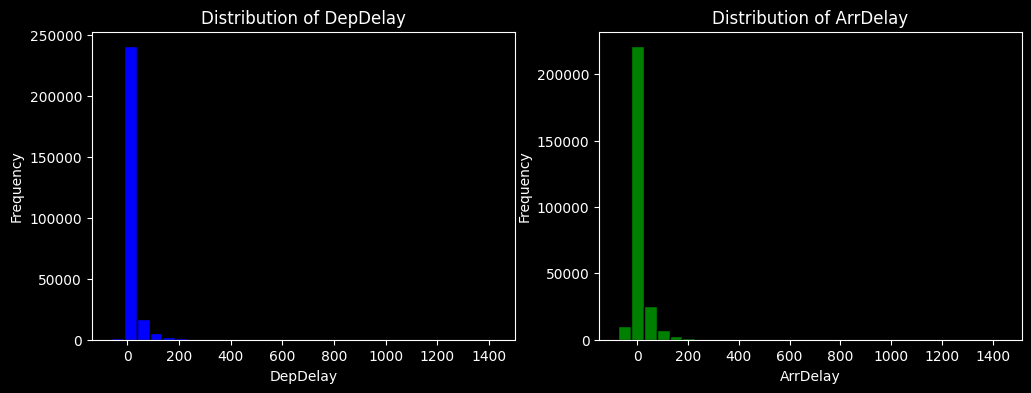

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# DepDelay

axes[0].hist(df_flights["DepDelay"], bins=30, color='blue', edgecolor='black')
axes[0].set_title("Distribution of DepDelay")
axes[0].set_xlabel("DepDelay")
axes[0].set_ylabel("Frequency")

# ArrDelay

axes[1].hist(df_flights["ArrDelay"], bins=30, color='green', edgecolor='black')
axes[1].set_title("Distribution of ArrDelay")
axes[1].set_xlabel("ArrDelay")
axes[1].set_ylabel("Frequency")

plt.show()


**Normality Test**

In [164]:
stat, p = shapiro(df_flights["DepDelay"])
print("DepDelay : p-value =", p)

DepDelay : p-value = 3.123147122123667e-187


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 269179.
  res = hypotest_fun_out(*samples, **kwds)


In [165]:
stat, p = shapiro(df_flights["ArrDelay"])
print("ArrDelay : p-value =", p)

ArrDelay : p-value = 1.8036666209722094e-177


*DepDelay and ArrDelay do not follow a normal distribution from a statistical standpoint, with a 5% significance level.*


# Average Departure and Arrival Delays

In [166]:
# Average departure delay

average_dep = df_flights["DepDelay"].mean()

# Average arrival delay

average_arr = df_flights["ArrDelay"].mean()

print(f"Average departure delay: {average_dep:.2f} minutes")
print(f"Average arrival delay: {average_arr:.2f} minutes")

Average departure delay: 10.46 minutes
Average arrival delay: 6.56 minutes


*Flights experience an average departure delay of 10.46 minutes, while arrival delays average 6.56 minutes.*


# Comparison of Airlines for Arrival Delays


Carrier
MQ    13.705893
F9    11.469873
EV    10.388515
B6     9.875243
VX     9.464629
WN     8.114542
YV     8.033918
FL     7.662590
AA     7.380899
OO     6.153706
9E     5.256995
UA     4.885221
US     4.040999
DL     2.420039
HA     1.444089
AS    -0.129887
Name: ArrDelay, dtype: float64


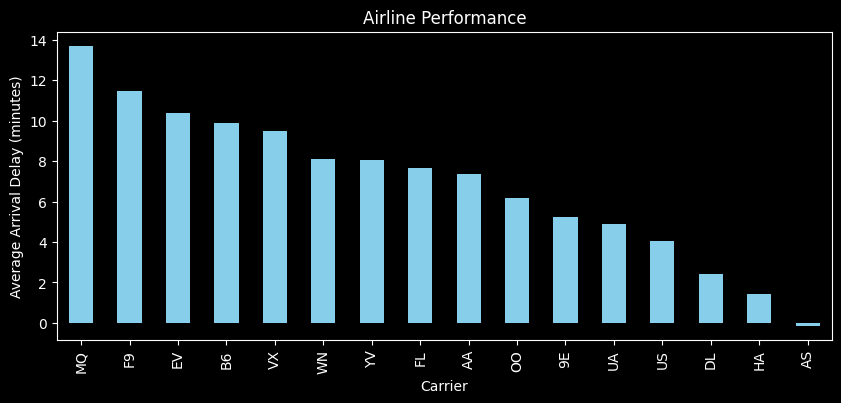

In [167]:
# Average Arrival Delays by Airline

arrival_delay_by_carrier = df_flights.groupby("Carrier")["ArrDelay"].mean().sort_values(ascending=False)
print(arrival_delay_by_carrier)

# Visualization

arrival_delay_by_carrier.plot(kind="bar", figsize=(10,4), color="skyblue")
plt.ylabel("Average Arrival Delay (minutes)")
plt.title("Airline Performance")
plt.show()


The results show that airline performance varies considerably in terms of arrival punctuality. For example, **MQ**, **F9**, and **EV** record the highest average delays (over 10 minutes), indicating poorer performance, whereas **DL**, **HA**, and especially **AS** have the lowest delays, with some flights even arriving slightly early, reflecting better punctuality.


# Let's check if there is a significant difference in arrival delays across the days of the week


/tmp/ipython-input-2981002142.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="DayOfWeek", y="ArrDelay", data=average_delays_day, palette="viridis")


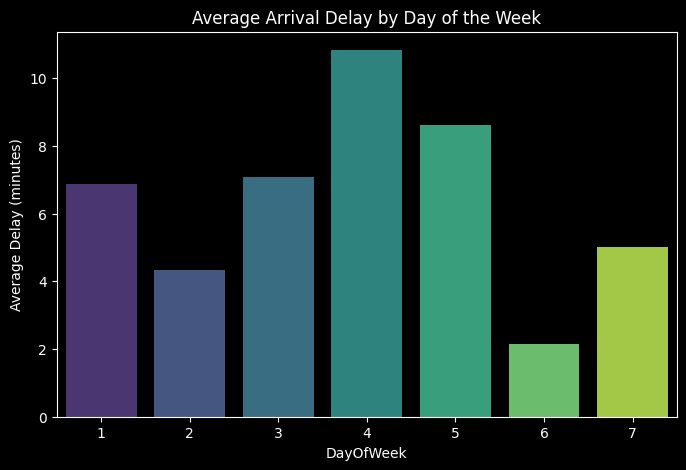

In [168]:
# Average Arrival Delays by Day of the Week

average_delays_day = df_flights.groupby("DayOfWeek")["ArrDelay"].mean().reset_index()

# Visualization

plt.figure(figsize=(8,5))
sns.barplot(x="DayOfWeek", y="ArrDelay", data=average_delays_day, palette="viridis")
plt.title("Average Arrival Delay by Day of the Week")
plt.ylabel("Average Delay (minutes)")
plt.show()


*The results show that arrival delays vary by day of the week. **Thursdays (day 4)** and **Fridays (day 5)** have the highest average delays, while **Saturdays (day 6)** and **Tuesdays (day 2)** have the lowest. This suggests that punctuality is better at the end of the week, likely due to lighter air traffic.*


In [169]:
# ============================

# One-Way ANOVA

# ============================

# - 'ArrDelay': arrival delay (dependent variable)

# - 'DayOfWeek': day of the week (coded 1 to 7)

# ANOVA model

model = ols('ArrDelay ~ C(DayOfWeek)', data=df_flights).fit()
anova_table = sm.stats.anova_lm(model)

print("=== ANOVA Results ===")
print(anova_table)

=== ANOVA Results ===
                    df        sum_sq        mean_sq           F         PR(>F)
C(DayOfWeek)       6.0  1.814127e+06  302354.560758  205.766588  6.316369e-263
Residual      269172.0  3.955228e+08    1469.405522         NaN            NaN


# Checking the Assumptions of ANOVA

**Histogram of the Residuals**


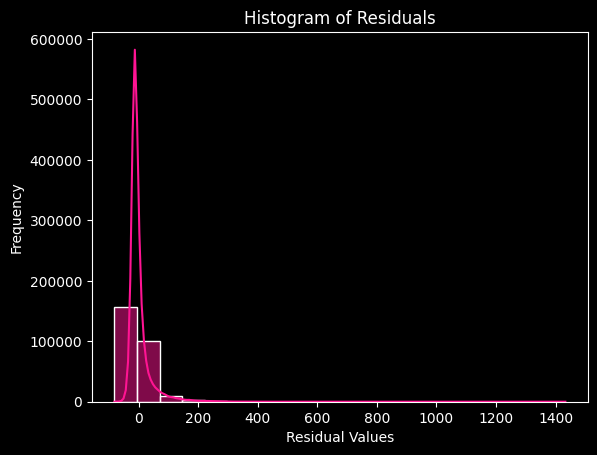

In [170]:
# Extracting the Residuals

residuals = model.resid

# Histogram of residuals with Seaborn

sns.histplot(residuals, kde=True, color="deeppink", bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.show()

*The histogram of the residuals shows an asymmetric distribution,*

*which implies that the residuals are not normally distributed.*

**Normality Test**

In [171]:
stat, p = shapiro(residuals)
print("Shapiro-Wilk Statistic =", stat)
print("p-value =", p)
if p > 0.05:
  print("The residuals appear to be normally distributed.")
else:
  print("The residuals are not normally distributed.")

Shapiro-Wilk Statistic = 0.6075120255800558
p-value = 2.579888266125521e-177
The residuals are not normally distributed.


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 269179.
  res = hypotest_fun_out(*samples, **kwds)


**Conclusion**: *The residuals do not follow a normal distribution.*

**Test for Homogeneity of Variances**

In [172]:
# Retrieve arrival delays by day

groups = [group["ArrDelay"].values for name, group in df_flights.groupby("DayOfWeek")]

# Levene's test

stat, pvalue = levene(*groups)

print("\n=== Levene's Test ===")
print("Statistic =", stat)
print("p-value =", pvalue)

# Interpretation

if pvalue > 0.05:
  print("The variances are homogeneous (homoscedasticity).")
else:
  print("The variances differ (heteroscedasticity).")


=== Levene's Test ===
Statistic = 93.52924566237525
p-value = 7.337485710125373e-118
The variances differ (heteroscedasticity).


**The assumptions of `residual normality` and `homoscedasticity` for ANOVA are not met.**

*The Kruskal-Wallis test, an alternative to ANOVA, will allow us to address this question from a statistical perspective.*


**Kruskall Wallis Test**

In [173]:
# Kruskal-Wallis Test

# Retrieve arrival delays by day

groups_s = [g["ArrDelay"].values for name, g in df_flights.groupby("DayOfWeek")]

# Kruskal-Wallis test

stat, pvalue = kruskal(*groups_s)

print("=== Kruskal-Wallis Test ===")
print("Statistic =", stat)
print("p-value =", pvalue)

# Interpretation

if pvalue > 0.05:
  print("No significant difference between the days.")
else:
  print("Significant difference between at least two days.")


=== Kruskal-Wallis Test ===
Statistic = 1933.3202158648114
p-value = 0.0
Significant difference between at least two days.


*The average arrival delays vary significantly from one day to another.*

**So a question arises!**

**Which groups show these differences?**

*The Dunnett test will allow us to answer this question.*


In [174]:
# Post-hoc Dunn Test with Bonferroni Correction

dunn = sp.posthoc_dunn(df_flights, val_col='ArrDelay', group_col='DayOfWeek', p_adjust='bonferroni')

print("=== Post-hoc Dunn Test (adjusted p-values) ===")
print(dunn)

=== Post-hoc Dunn Test (adjusted p-values) ===
              1              2             3              4              5  \
1  1.000000e+00   4.398046e-29  1.000000e+00   1.422312e-67   4.047559e-19   
2  4.398046e-29   1.000000e+00  6.374402e-30  1.366827e-181   7.944859e-93   
3  1.000000e+00   6.374402e-30  1.000000e+00   1.057401e-65   3.189253e-18   
4  1.422312e-67  1.366827e-181  1.057401e-65   1.000000e+00   5.569803e-15   
5  4.047559e-19   7.944859e-93  3.189253e-18   5.569803e-15   1.000000e+00   
6  1.701363e-95   2.284199e-22  9.947931e-97  7.306047e-302  6.117665e-189   
7  1.398914e-17   3.394174e-01  2.960654e-18  4.430966e-148   2.533025e-70   

               6              7  
1   1.701363e-95   1.398914e-17  
2   2.284199e-22   3.394174e-01  
3   9.947931e-97   2.960654e-18  
4  7.306047e-302  4.430966e-148  
5  6.117665e-189   2.533025e-70  
6   1.000000e+00   8.276262e-33  
7   8.276262e-33   1.000000e+00  


*The post-hoc Dunn test (with Bonferroni correction) reveals that arrival delays differ significantly across several days of the week. For example, delays on day 1 differ significantly from those on days 2, 4, 5, 6, and 7, but not from day 3. Similarly, day 2 does not differ significantly from day 7, while day 6 differs strongly from all other days, including day 7. These results confirm that average arrival delays are not evenly distributed across the days of the week.*

*-Note: DayOfWeek represents the days of the week (coded 1 to 7).*


# Departure Airport with the Highest Average Departure Delay

OriginAirportName
Chicago O'Hare International           16.656477
Chicago Midway International           16.083384
Dallas/Fort Worth International        14.492855
Newark Liberty International           14.203831
John F. Kennedy International          14.047801
                                         ...    
Salt Lake City International            4.990350
Tucson International                    4.672694
Long Beach Airport                      4.321770
Kahului Airport                         2.305410
Ted Stevens Anchorage International     2.221925
Name: DepDelay, Length: 70, dtype: float64


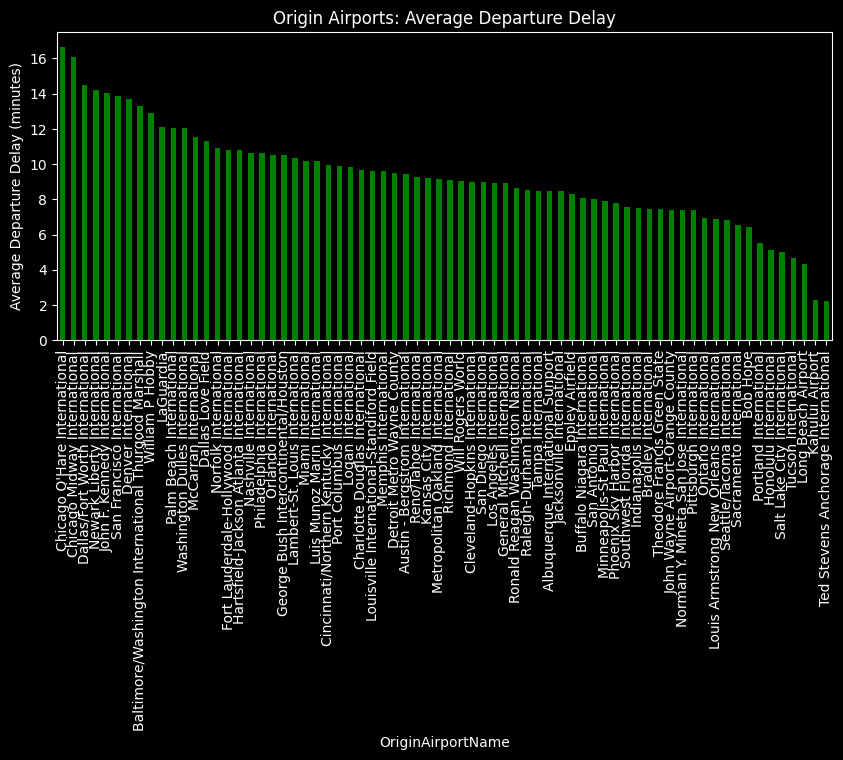

In [175]:
# Average Departure Delays by Origin Airport

departure_delay_by_airport = df_flights.groupby('OriginAirportName')["DepDelay"].mean().sort_values(ascending=False)
print(departure_delay_by_airport)

# Visualization

departure_delay_by_airport.plot(kind="bar", figsize=(10,4), color="green")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Origin Airports: Average Departure Delay")
plt.show()

*The departure airport with the highest average departure delay is* **Chicago O'Hare International**.


# Let's check whether delayed departures generally lead to longer arrival delays compared to on-time departures.

In [176]:
# Departure Delays

df_delayed = df_flights[df_flights['DepDel15'] == 1]

# Descriptive analysis of arrival delays for flights delayed at departure

df_delayed['ArrDelay'].describe()

,ArrDelay
count,54141.000000
mean,54.106869
std,61.776873
min,-43.000000
25%,17.000000
50%,35.000000
75%,70.000000
max,1440.000000


In [177]:
# On-Time or Early Departures

df_ontime = df_flights[df_flights['DepDel15'] == 0]

# Descriptive analysis of arrival delays for flights that departed on time or early

df_ontime['ArrDelay'].describe()

,ArrDelay
count,215038.000000
mean,-5.406956
std,13.210212
min,-75.000000
25%,-13.000000
50%,-6.000000
75%,1.000000
max,164.000000


/tmp/ipython-input-2823195793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ontime['Departure_Status'] = 'On Time or Early'
/tmp/ipython-input-2823195793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delayed['Departure_Status'] = 'Delayed'
/tmp/ipython-input-2823195793.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Departure_Status'

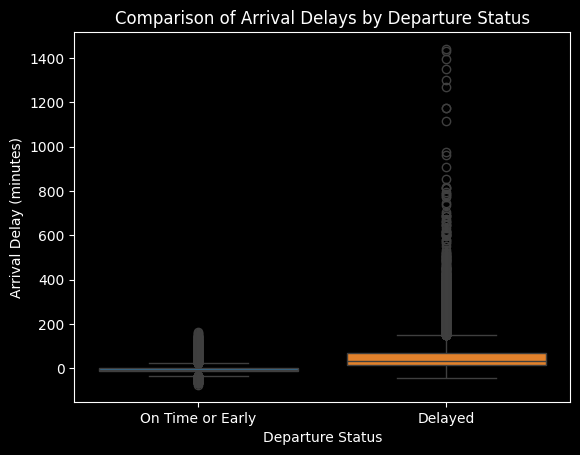

In [178]:
# Add a 'Departure_Status' column to each group

df_ontime['Departure_Status'] = 'On Time or Early'
df_delayed['Departure_Status'] = 'Delayed'

# Combine the two subsets

df_compare = pd.concat([df_ontime, df_delayed])

# Plot the boxplot

sns.boxplot(x='Departure_Status', y='ArrDelay', data=df_compare, palette=["#1f77b4", "#ff7f0e"])
plt.ylabel("Arrival Delay (minutes)")
plt.xlabel("Departure Status")
plt.title("Comparison of Arrival Delays by Departure Status")
plt.show()


*From this boxplot, delayed departures generally lead to `longer arrival delays` compared to on-time departures.*

# Statistical Verification Using the Student's t-Test

**Student's t-Test**


In [179]:
# Fisher-Snedecor Variance Test

# Extract the two groups

group_ontime = df_compare[df_compare['Departure_Status'] == 'On Time or Early']['ArrDelay']
group_delayed = df_compare[df_compare['Departure_Status'] == 'Delayed']['ArrDelay']

# Calculate variances

var1 = np.var(group_ontime, ddof=1)
var2 = np.var(group_delayed, ddof=1)

# Calculate the F statistic

F = var1 / var2
df1 = len(group_ontime) - 1
df2 = len(group_delayed) - 1

# Calculate the two-tailed p-value

p_value = 2 * min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))

print(f"F statistic = {F:.4f}")
print(f"p-value = {p_value:.4e}")

# Interpretation

alpha = 0.05
if p_value < alpha:
  print("The variances are significantly different.")
else:
  print("The variances can be considered equal.")

F statistic = 0.0457
p-value = 0.0000e+00
The variances are significantly different.


In [180]:
# Extract the two groups
group_ontime = df_compare[df_compare['Departure_Status'] == 'On Time or Early']['ArrDelay']
group_delayed = df_compare[df_compare['Departure_Status'] == 'Delayed']['ArrDelay']

# Student's t-test for independent samples
t_stat, p_value = ttest_ind(group_ontime, group_delayed, equal_var=False)  # equal_var=False because of the Fisher test result

print(f"t statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4e}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("The means are significantly different.")
else:
    print("No significant difference between the means.")


t statistic = -222.8791
p-value = 0.0000e+00
The means are significantly different.


**Conclusion**: *The Student's t-test allows us to assert, with a 5% risk of error (α = 0.05), that there is a significant difference in average arrival delays depending on the departure status (delayed departure versus on-time or early departure).*

**Therefore, we conclude that delayed departures generally lead to longer arrival delays compared to on-time departures.**


# Identify the Route (from Departure to Destination Airport) with the Most Delayed Arrivals


In [181]:
df_flights['Route'] = df_flights['OriginAirportName'] + " → " + df_flights['DestAirportName']
delayed_flights = df_flights[df_flights['ArrDel15'] == 1]
delays_by_route = delayed_flights.groupby('Route').size().sort_values(ascending=False)
most_delayed_route = delays_by_route.head(1)
print(f"The route with the most delayed arrivals is: {most_delayed_route}")

The route with the most delayed arrivals is: Route
Los Angeles International → San Francisco International    291
dtype: int64


# Identify the Route with the Highest Average Arrival Delay


In [182]:
average_delay = df_flights.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)
highest_avg_delay_route = average_delay.head(1)
print(f"The route with the highest average arrival delay is: {highest_avg_delay_route}")

The route with the highest average arrival delay is: Route
Southwest Florida International → Denver International    81.0
Name: ArrDelay, dtype: float64
